In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###### EDA

In [5]:
df.satisfaction_level.isnull().value_counts()

False    14999
Name: satisfaction_level, dtype: int64

<AxesSubplot:xlabel='number_project', ylabel='count'>

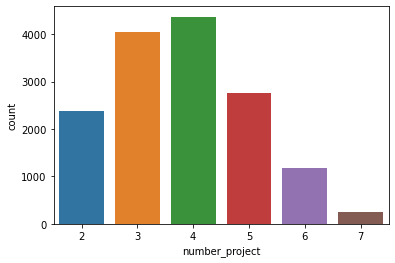

In [6]:
sns.countplot(x='number_project',data=df)

In [7]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

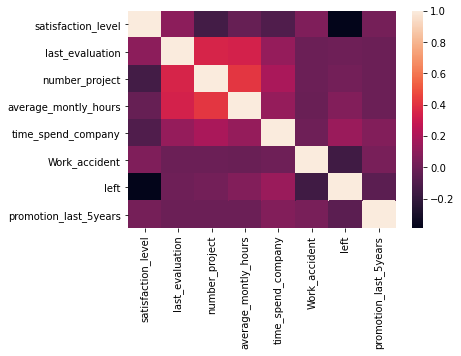

In [8]:
sns.heatmap(df.corr())

##### from the above correlation we understand the person left the company depends on the average_monthly_hours, time_spend_company,work_accident,Promotion last five years

##### To Determine the impact of department and salary on employee left the company or not

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_dept=LabelEncoder()
le_sal=LabelEncoder()


In [12]:
df['dept_n']=le_dept.fit_transform(df['Department'])
df['sal_n']=le_sal.fit_transform(df['salary'])

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,dept_n,sal_n
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


<AxesSubplot:xlabel='dept_n', ylabel='count'>

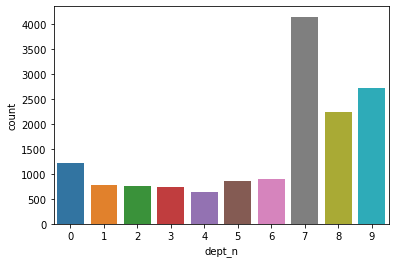

In [14]:
sns.countplot(x='dept_n',data=df)

<AxesSubplot:xlabel='sal_n', ylabel='count'>

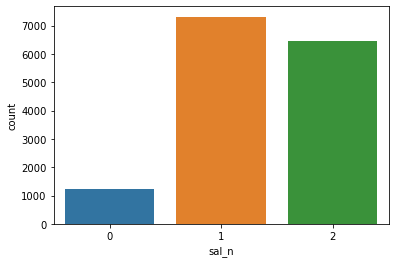

In [15]:
sns.countplot(x='sal_n',data=df)

In [17]:
df['sal_n'].isnull().value_counts()

False    14999
Name: sal_n, dtype: int64

In [18]:
df0=df[df.left==1]
df1=df[df.left==0]

In [20]:
df0.shape

(3571, 12)

In [21]:
df1.shape

(11428, 12)

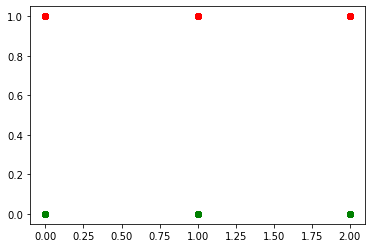

In [25]:
plt.scatter(x='sal_n',y='left',data=df0,color='red')
plt.scatter(x='sal_n',y='left',data=df1,color='green')

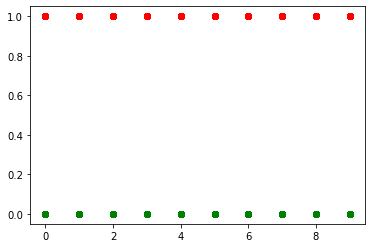

In [29]:

plt.scatter(x='dept_n',y='left',data=df0,color='red')
plt.scatter(x='dept_n',y='left',data=df1,color='green')

###### Decide the x to deterime wheater the employee left the company or not


In [40]:
x=df[['dept_n','sal_n','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y=df[['left']]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier(n_neighbors=5)

In [45]:
knn.fit(x_train,y_train)

<ipython-input-45-17b0ab828d68>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


KNeighborsClassifier()

In [46]:
knn.predict([[0,1,40,5,0,5]])

array([0], dtype=int64)

In [47]:
knn.score(x_test,y_test)

0.8524444444444444

In [48]:
y_pred=knn.predict(x_test)

In [55]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix

In [56]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.92      0.90      3296\n           1       0.75      0.68      0.71      1204\n\n    accuracy                           0.85      4500\n   macro avg       0.82      0.80      0.81      4500\nweighted avg       0.85      0.85      0.85      4500\n'

In [57]:
f1_score(y_pred,y_test)

0.7113043478260869

In [58]:
confusion_matrix(y_pred,y_test)

array([[3018,  278],
       [ 386,  818]], dtype=int64)